<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/5_algoritmes_no_supervisats.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/5_algoritmes_no_supervisats.ipynb)

</div>

# Unitat 5: Algoritmes no supervisats: Agrupament / Clustering

L'agrupament (*clustering*) és una tècnica que ens permet trobar grups d'objectes similars que estan més relacionats entre si que amb objectes d'altres grups. Entre els exemples d'aplicacions d'agrupació en clústers s'inclouen l'agrupació de documents, música i pel·lícules per diferents temes, o la cerca de clients que comparteixin interessos similars en funció de comportaments de compra comuns com a base per als motors de recomanació.

Existeixen múltiples algorismes de clustering, en aquesta [llibreria](https://scikit-learn.org/stable/modules/clustering.html#clustering) podeu trobar la majoria d'ells implementats. Aquests algoritmes consideren diversos criteris com la distància entre punts, la densitat, distància en grafs, etc.

Introduïm dos algorismes bàsics:

- K-Means
- Spectral Clustering

## K-Means

L'algoritme **K-means** redueix la dimensionalitat de les mostres mitjançant el càlcul de centroides, que són punts representatius de cada *clúster*. És un mètode paramètric pel qual s'estableix el nombre de clústers (grups) segons el paràmetre **K**, que ha de ser definit prèviament per l'usuari. El seu comportament es pot visualitzar mitjançant una representació gràfica, la qual ajuda a entendre la distribució i la separació dels diferents clústers en l'espai multidimensional.

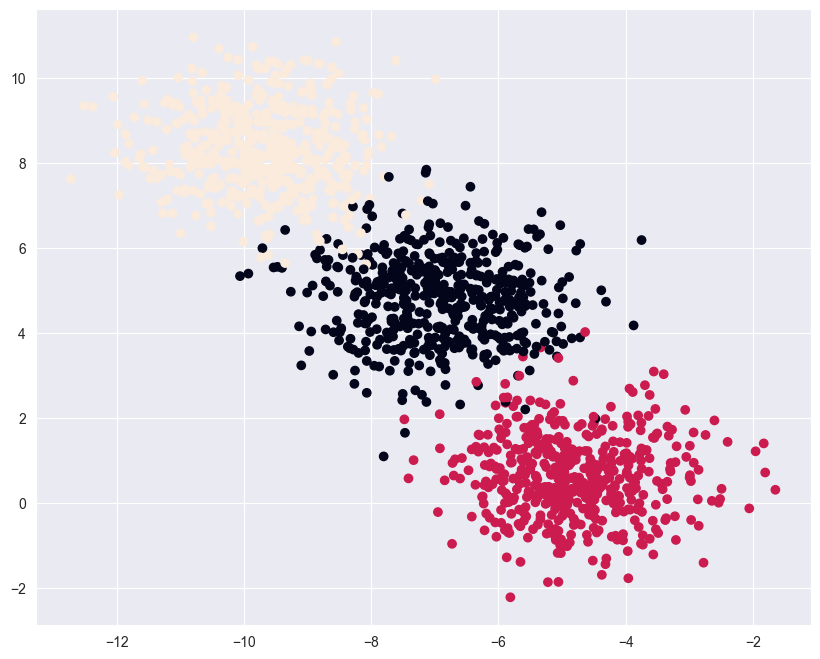

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

C:\Users\miquel\miniconda3\envs\ia2024\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\miquel\miniconda3\envs\ia2024\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


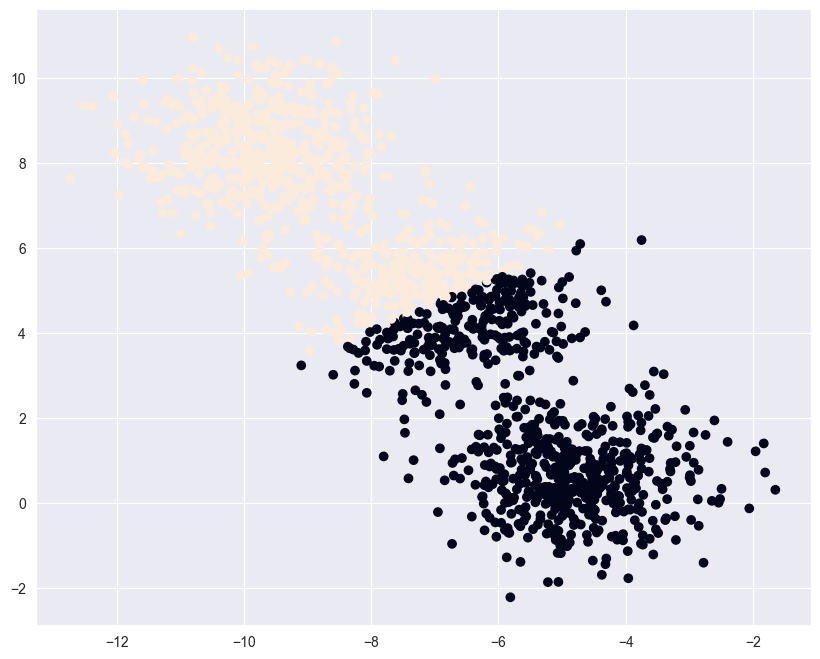

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

En el gràfic anterior els dos colors representen els grups que s'han identificat mitjançant K-means. 

Cream un nou conjunt de dades. Aquesta vegada més superposats.

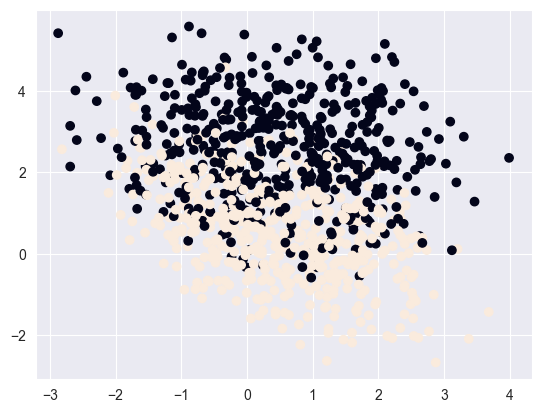

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2023, n_clusters_per_class=1)
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

plt.scatter(X[:,0],X[:,1],c=y)

I tornam a aplicar-hi l'algoritme ``k-means``.

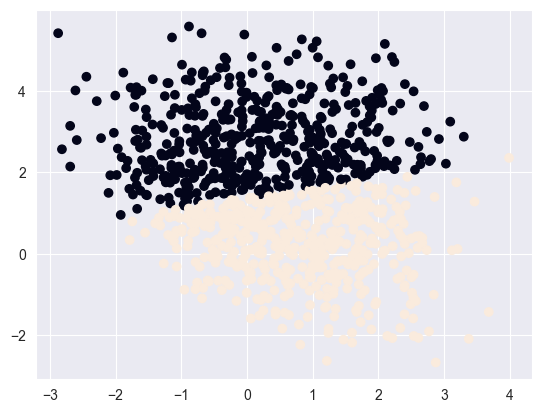

In [6]:
# I sobre les dades que hem Y sobre esos datos volvemos a aplicar nuestro k-Means
model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### Nombre adequat de grups

Un dels principals desafiaments de l'aprenentatge no supervisat és que no coneixem la resposta definitiva a una de les preguntes principals: **quants de grups hi ha?**. Ho podem dir d'una altra manera, no disposam d'etiquetes de classe en el nostre conjunt de dades. Per tant, per a quantificar la qualitat del clustering, necessitem utilitzar mètriques intrínseques, com la *SSE* dins de l'agrupació per a comparar el rendiment de diferents agrupacions.

$$ SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} ||x^{(i)} - \mu^{(j)} ||^2 $$

a on $\mu^{(j)}$ és el centroide del _cluster_ $j$,  i $w^{(i,j)} = 1$ si la mostra $x^{(i)}$ forma part del clúster $j$ i $w^{(i,j)} = 0$ en cas contrari.

Aquesta tècnica se la coneix com el mètode del colze o **elbow method**. En el següent codi mostram com es veuria gràficament el mètode del colze amb les dades que hem emprat anteriorment.  

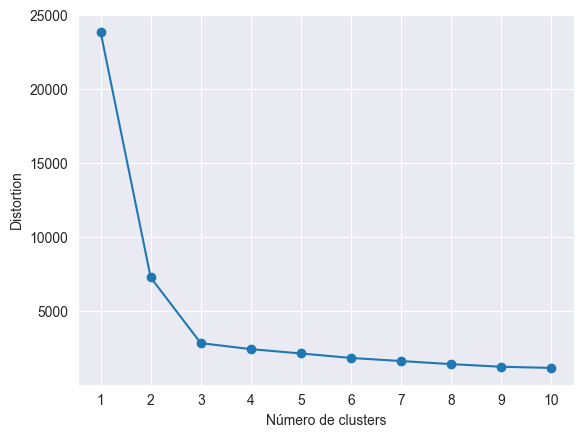

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 12
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,11))
plt.show()

Del gràfic anterior podem observar que el millor nombre clústers és **3**. Podem veure el resultat tot seguit.



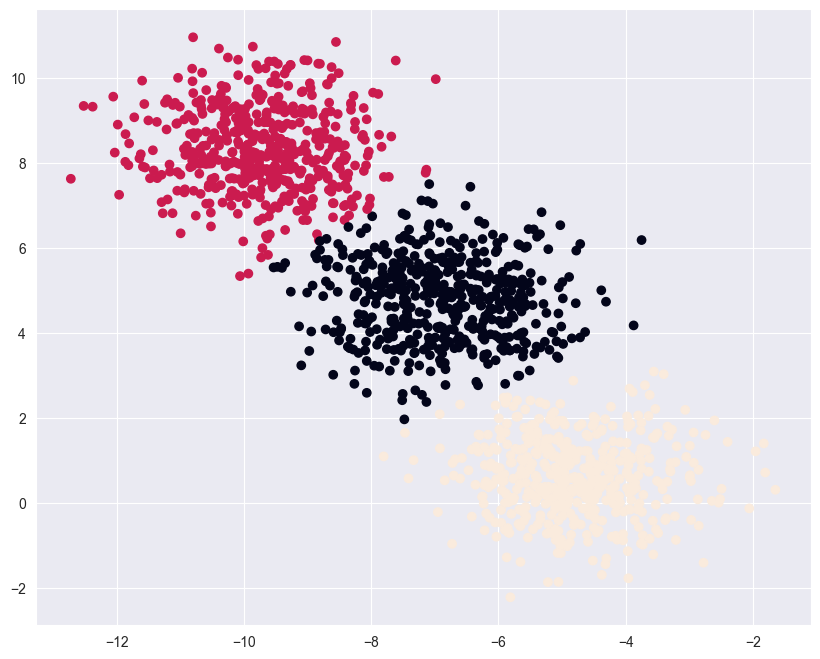

In [10]:
model = KMeans(n_clusters=3, random_state=2023)
y_pred = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Spectral Clustering

La tècnica [*spectral clustering*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 és útil quan els grups no tenen una forma clara o convexa, és a dir, quan no tenen una forma compacta i regular com la d'un cercle o una el·lipse, que permetria definir fàcilment un centre. També és útil quan descriure els grups només amb el seu centre i dispersió no és suficient. Un exemple seria identificar grups amb formes més complexes, com cercles concèntrics en un pla 2D.


Aquest mètode té com a paràmetre més importants:
- El nombre de clusters, similar al paràmetre ``k`` de l'algoritme *k-means*.


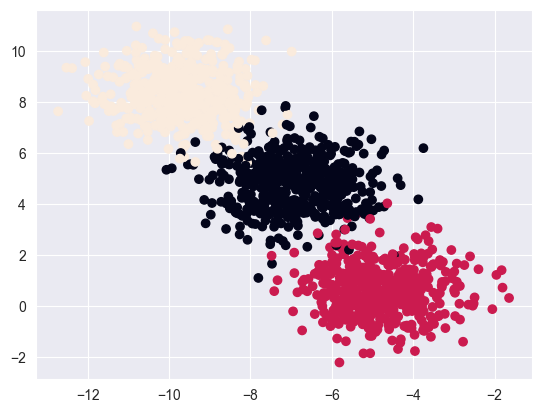

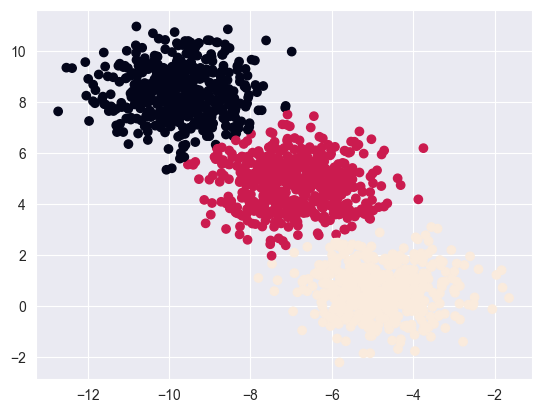

In [12]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

sc = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
y_pred = sc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## <span style="color:red">Activitats</span>

Realització un estudi entre K-Means i Spectral Clustering amb el següent dataset ([*data/Live.csv*](https://archive.ics.uci.edu/ml/datasets/facebook+Live+Sellers+*in+*Thailand)). 

- Càrrega, **selecciona** i prepara les dades.
- Quines agrupacions es realitzen sobre les dades? És a dir, proporciona una interpretació de cada una de les agrupacions. 
- Avalua la idoneïtat dels diferents grups identificats.


In [1]:
pathfile = "data/Live_20210128.csv"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# És important veure quina informació es carrega (a l'enllaç del data/live.csv)
# https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand
# Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

print("Pandas version: ", pd.__version__)

# Les mètriques d'interacció inclouen comentaris, comparticions i reaccions.
# Carregant dades amb la informació aportada. Així, la primera columna i les 4 darreres es poden no carregar.
df = pd.read_csv(pathfile,usecols=range(1,12))

df.head()

status_type status_published  num_reactions  num_comments  num_shares  \
0       video   4/22/2018 6:00            529           512         262   
1       photo  4/21/2018 22:45            150             0           0   
2       video   4/21/2018 6:17            227           236          57   
3       photo   4/21/2018 2:29            111             0           0   
4       photo   4/18/2018 3:22            213             0           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0        432         92         3          1         1           0  
1        150          0         0          0         0           0  
2        204         21         1          1         0           0  
3        111          0         0          0         0           0  
4        204          9         0          0         0           0

In [26]:
# Si tenim dates associades, podem parlar d'una sèrie temporal i és possible que es detectin patrons en les dades,
# de manera que s'han de tractar d'una altra forma.

from pandas import DatetimeIndex
df.index = DatetimeIndex(df["status_published"])
df.drop(columns="status_published",inplace=True)
df

status_type  num_reactions  num_comments  num_shares  \
status_published                                                           
2018-04-22 06:00:00       video            529           512         262   
2018-04-21 22:45:00       photo            150             0           0   
2018-04-21 06:17:00       video            227           236          57   
2018-04-21 02:29:00       photo            111             0           0   
2018-04-18 03:22:00       photo            213             0           0   
...                         ...            ...           ...         ...   
2016-09-24 02:58:00       photo             89             0           0   
2016-09-23 11:19:00       photo             16             0           0   
2016-09-21 23:03:00       photo              2             0           0   
2016-09-20 00:43:00       photo            351            12          22   
2016-09-10 10:30:00       photo             17             0           0   

                     num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_published                                                           
2018-04-22 06:00:00        432         92         3          1         1   
2018-04-21 22:45:00        150          0         0          0         0   
2018-04-21 06:17:00        204         21         1          1         0   
2018-04-21 02:29:00        111          0         0          0         0   
2018-04-18 03:22:00        204          9         0          0         0   
...                        ...        ...       ...        ...       ...   
2016-09-24 02:58:00         89          0         0          0         0   
2016-09-23 11:19:00         14          1         0          1         0   
2016-09-21 23:03:00          1          1         0          0         0   
2016-09-20 00:43:00        349          2         0          0         0   
2016-09-10 10:30:00         17          0         0          0         0   

                     num_angrys  
status_published                 
2018-04-22 06:00:00           0  
2018-04-21 22:45:00           0  
2018-04-21 06:17:00           0  
2018-04-21 02:29:00           0  
2018-04-18 03:22:00           0  
...                         ...  
2016-09-24 02:58:00           0  
2016-09-23 11:19:00           0  
2016-09-21 23:03:00           0  
2016-09-20 00:43:00           0  
2016-09-10 10:30:00           0  

[7050 rows x 10 columns]

In [27]:
df.groupby(df.index.year)["status_type"].count() 
# Mostres del 2012 al 2018, amb un increment de les mostres més notable els dos darrers anys.


status_published
2012     589
2013     500
2014     233
2015     337
2016     588
2017    2253
2018    2550
Name: status_type, dtype: int64

In [28]:
df.groupby(df.index.year)[df.columns[1:]].sum()
# De les darreres columnes (loves, vows, hahas, sads i angrys) no hi ha mostres fins al 2016.


num_reactions  num_comments  num_shares  num_likes  \
status_published                                                       
2012                      12389          4053         110      12389   
2013                      45524          3018         513      45524   
2014                     141631          4623         841     141631   
2015                     519039         11359        2936     519039   
2016                     105220         61065        4105     101501   
2017                     259280        731519       90793     227617   
2018                     539243        766073      182861     468353   

                  num_loves  num_wows  num_hahas  num_sads  num_angrys  
status_published                                                        
2012                      0         0          0         0           0  
2013                      0         0          0         0           0  
2014                      0         0          0         0           0  
2015                      0         0          0         0           0  
2016                   2803       424        150       329          13  
2017                  27497      1732       1506       646         263  
2018                  59437      6934       3254       743         522

In [ ]:
print(df.index.is_monotonic_increasing)# l'index no és "monotonic creixent" i no podem fer aquest tipus de slicing amb les noves versions
#len(df.loc["2016":"2018"]) / len(df) ### ERROR

df.sort_index(inplace=True) ### SOLUCIO, ordenar
print(df.index.is_monotonic_increasing)

False
True


In [30]:
# Hipòtesis de les futures agrupacions
# - Si agafam els primers 4 anys, hi ha mostres que no tindran certa informació i descompensaran la tendència present en els darrers anys.
# - És millor només agafar les mostres dels tres darrers anys (a més, així triem les que són més properes al comportament actual).

len(df.loc["2016":"2018"]) / len(df)
# Almenys fem servir un 76,45% de les mostres totals.


0.7646808510638298

In [ ]:
df_analysis = df["2016":].copy() ## Amb la nova versió, els nous df d'altres "seleccions de df existents" han d'esser una còpia.
df_analysis.head()
df_analysis["year"] = df_analysis.index.year


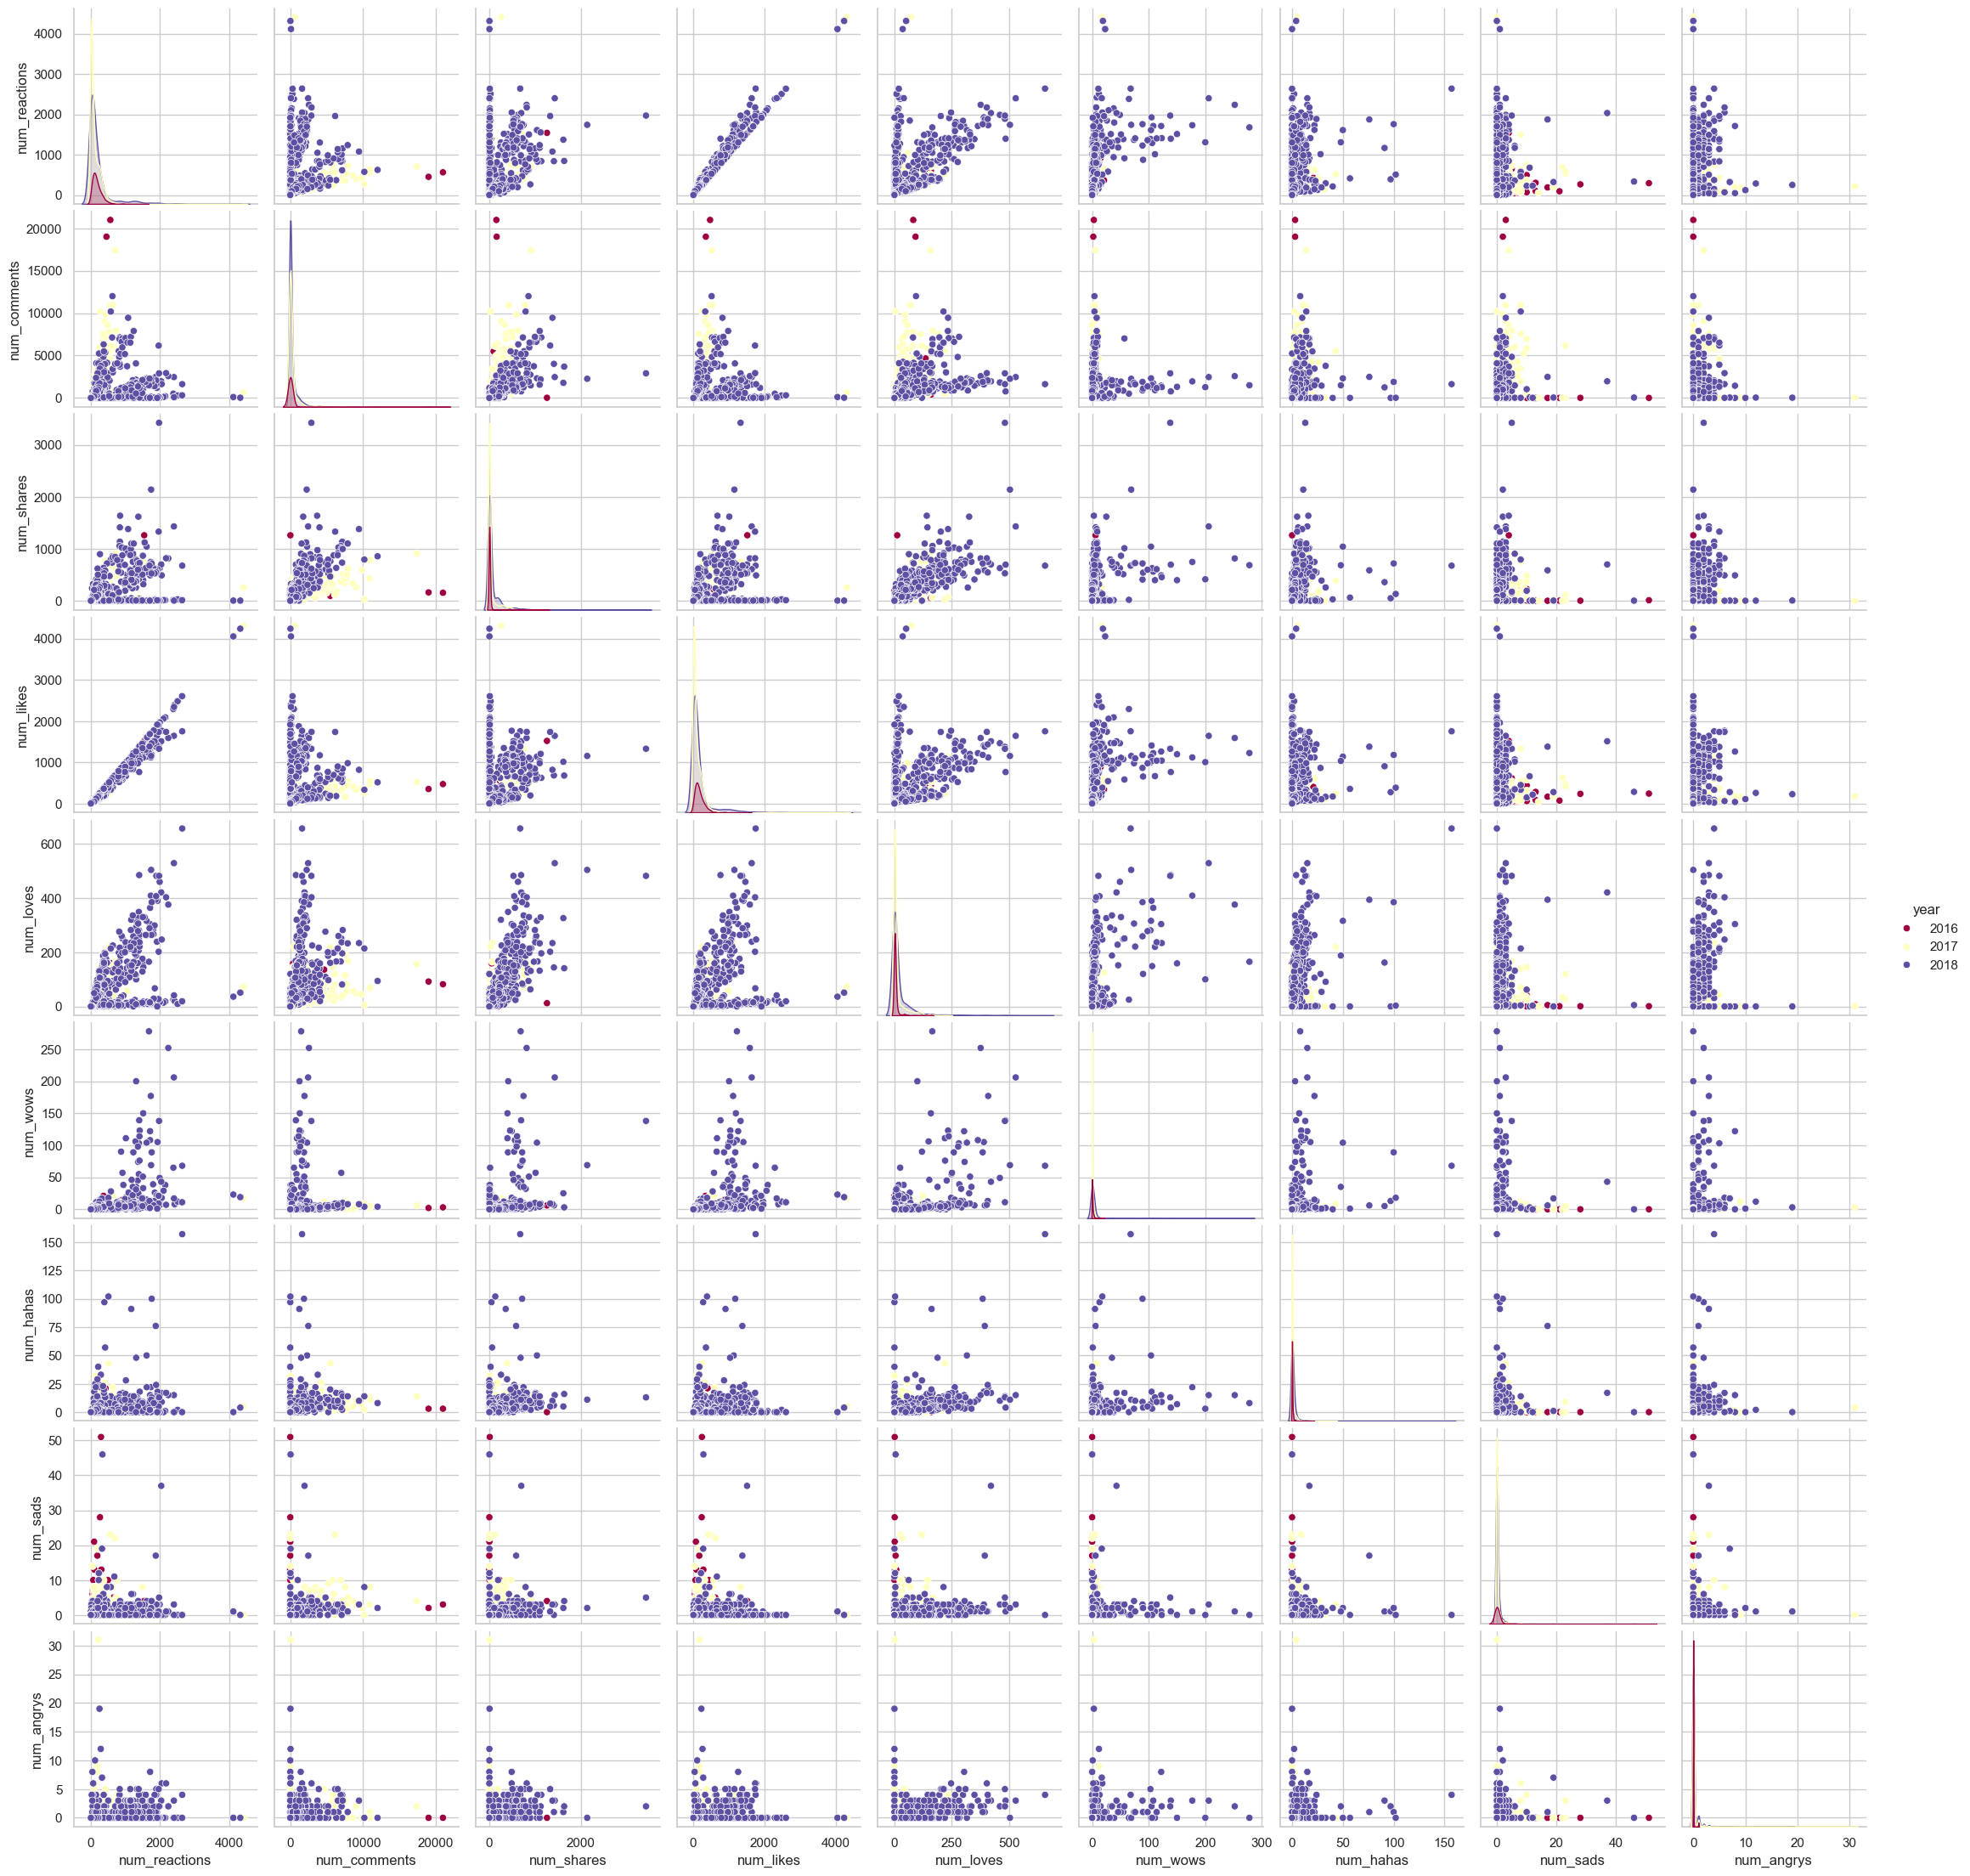

In [35]:
sns.set_theme(style="whitegrid")
sns.pairplot(df_analysis, hue="year",palette="Spectral")

# Com podem veure en aquesta imatge, l'any tindrà un efecte molt distintiu en l'agrupació.
# Potser seria interessant agafar només el darrer any.
# Per simplificar, agafarem els tres darrers anys i veurem quines conclusions podem extreure.

# NOTA: Hi ha algorismes específics per agrupar sèries temporals:
# Petitjean F., Ketterlin A., Gançarski P., A global averaging method for dynamic time warping, with applications to clustering, Pattern Recognition, 44(3), 678-693, 2011
# Qiu, Cuipeng Qiu, Chengyun Song, ESDTW: Extrema-based shape dynamic time warping, 2024, https://doi.org/10.1016/j.eswa.2023.122432.


In [36]:
## Preparació de les dades
df_analysis.head()

status_type  num_reactions  num_comments  num_shares  \
status_published                                                           
2016-01-03 04:23:00       photo             21             2           0   
2016-01-03 04:23:00       photo             25             8           0   
2016-01-03 04:28:00      status            108             8           0   
2016-01-03 06:55:00       photo            286             5           0   
2016-01-05 02:20:00       photo            152            30           0   

                     num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_published                                                           
2016-01-03 04:23:00         21          0         0          0         0   
2016-01-03 04:23:00         25          0         0          0         0   
2016-01-03 04:28:00        108          0         0          0         0   
2016-01-03 06:55:00        286          0         0          0         0   
2016-01-05 02:20:00        152          0         0          0         0   

                     num_angrys  year  
status_published                       
2016-01-03 04:23:00           0  2016  
2016-01-03 04:23:00           0  2016  
2016-01-03 04:28:00           0  2016  
2016-01-03 06:55:00           0  2016  
2016-01-05 02:20:00           0  2016

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_analysis[["status_type"]] = enc.fit_transform(df_analysis[["status_type"]])
df_analysis.drop(columns="year",inplace=True)
df_analysis.head()

status_type  num_reactions  num_comments  num_shares  \
status_published                                                            
2016-01-03 04:23:00          1.0             21             2           0   
2016-01-03 04:23:00          1.0             25             8           0   
2016-01-03 04:28:00          2.0            108             8           0   
2016-01-03 06:55:00          1.0            286             5           0   
2016-01-05 02:20:00          1.0            152            30           0   

                     num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_published                                                           
2016-01-03 04:23:00         21          0         0          0         0   
2016-01-03 04:23:00         25          0         0          0         0   
2016-01-03 04:28:00        108          0         0          0         0   
2016-01-03 06:55:00        286          0         0          0         0   
2016-01-05 02:20:00        152          0         0          0         0   

                     num_angrys  
status_published                 
2016-01-03 04:23:00           0  
2016-01-03 04:23:00           0  
2016-01-03 04:28:00           0  
2016-01-03 06:55:00           0  
2016-01-05 02:20:00           0

In [38]:
# És recomanable normalitzar?
# Sí, ja que en afegir la columna "status_type" no té la mateixa dimensió que la resta (numèriques).

from scipy.stats import zscore
df_norm = df_analysis.apply(zscore)
df_norm.head()

status_type  num_reactions  num_comments  num_shares  \
status_published                                                            
2016-01-03 04:23:00    -0.812775      -0.468763     -0.284766    -0.34705   
2016-01-03 04:23:00    -0.812775      -0.455976     -0.278815    -0.34705   
2016-01-03 04:28:00     0.226028      -0.190649     -0.278815    -0.34705   
2016-01-03 06:55:00    -0.812775       0.378365     -0.281791    -0.34705   
2016-01-05 02:20:00    -0.812775      -0.049994     -0.256996    -0.34705   

                     num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_published                                                           
2016-01-03 04:23:00  -0.449832  -0.369992 -0.169681  -0.202245 -0.175121   
2016-01-03 04:23:00  -0.435656  -0.369992 -0.169681  -0.202245 -0.175121   
2016-01-03 04:28:00  -0.141501  -0.369992 -0.169681  -0.202245 -0.175121   
2016-01-03 06:55:00   0.489338  -0.369992 -0.169681  -0.202245 -0.175121   
2016-01-05 02:20:00   0.014437  -0.369992 -0.169681  -0.202245 -0.175121   

                     num_angrys  
status_published                 
2016-01-03 04:23:00   -0.178776  
2016-01-03 04:23:00   -0.178776  
2016-01-03 04:28:00   -0.178776  
2016-01-03 06:55:00   -0.178776  
2016-01-05 02:20:00   -0.178776

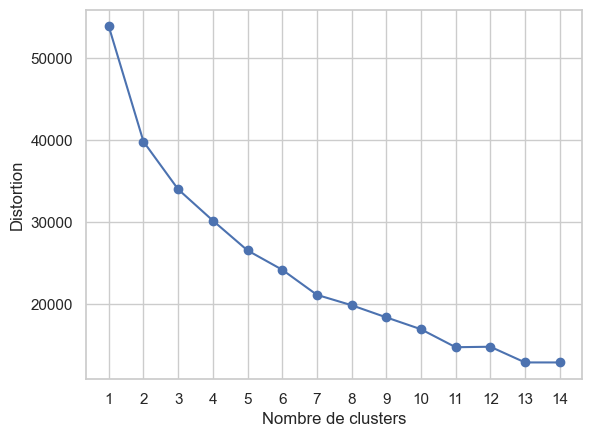

In [39]:
# KMEANs
distortions = []
test = 15
for i in range(1, test):
    km = KMeans(n_clusters=i,n_init=10,init='random', max_iter=300, random_state=0)
    km.fit(df_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,test), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,test))
plt.show()

In [40]:
# amb 9 groups hi ha un canvi 
model = KMeans(n_clusters=9, n_init = 'auto',random_state=1)
y_pred = model.fit_predict(df_norm)
y_pred

array([0, 0, 8, ..., 1, 8, 0], dtype=int32)

In [41]:
df_norm_t1 = df_norm.copy()
df_norm_t1["class"] = y_pred

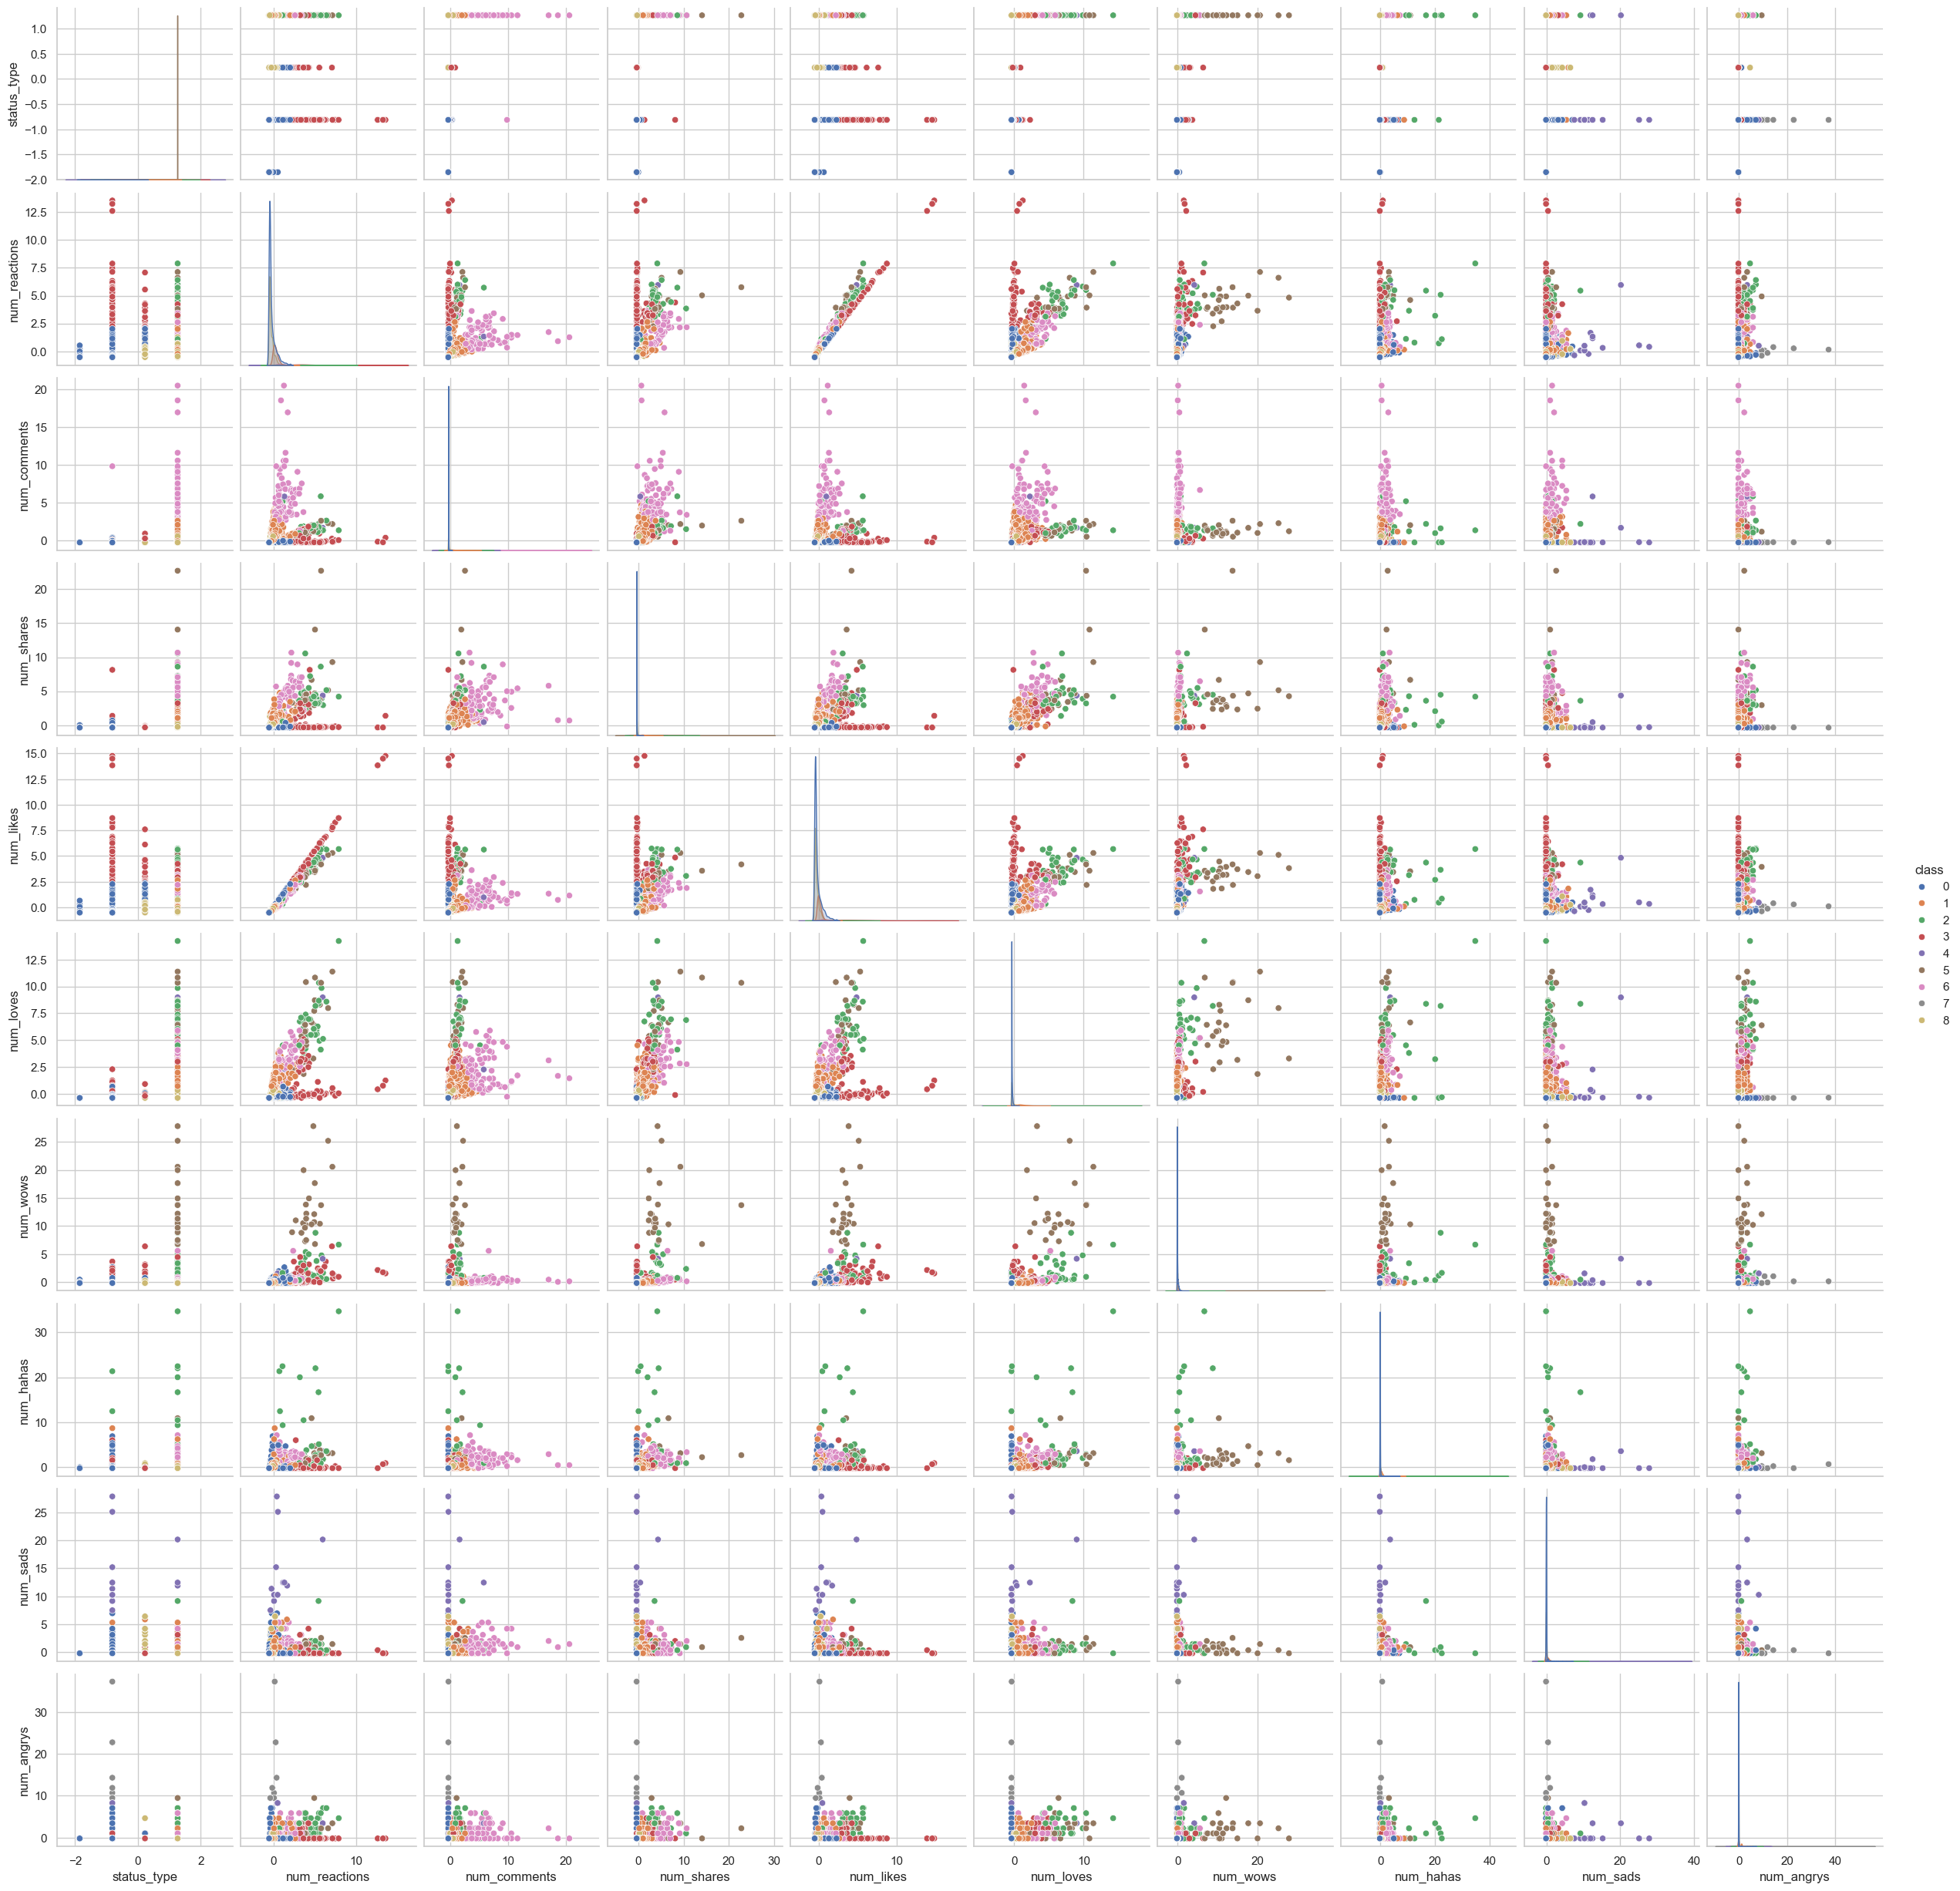

In [42]:
sns.pairplot(df_norm_t1, hue="class",palette="deep")

In [43]:
# El problema de tenir tants grups i dimensions (característiques o columnes) és que és difícil extreure una interpretació de cadascun.

# amb 3
model = KMeans(n_clusters=3, n_init = 'auto',random_state=1)
y_pred = model.fit_predict(df_norm)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [44]:
df_norm_t2 = df_norm.copy()
df_norm_t2["class"] = y_pred

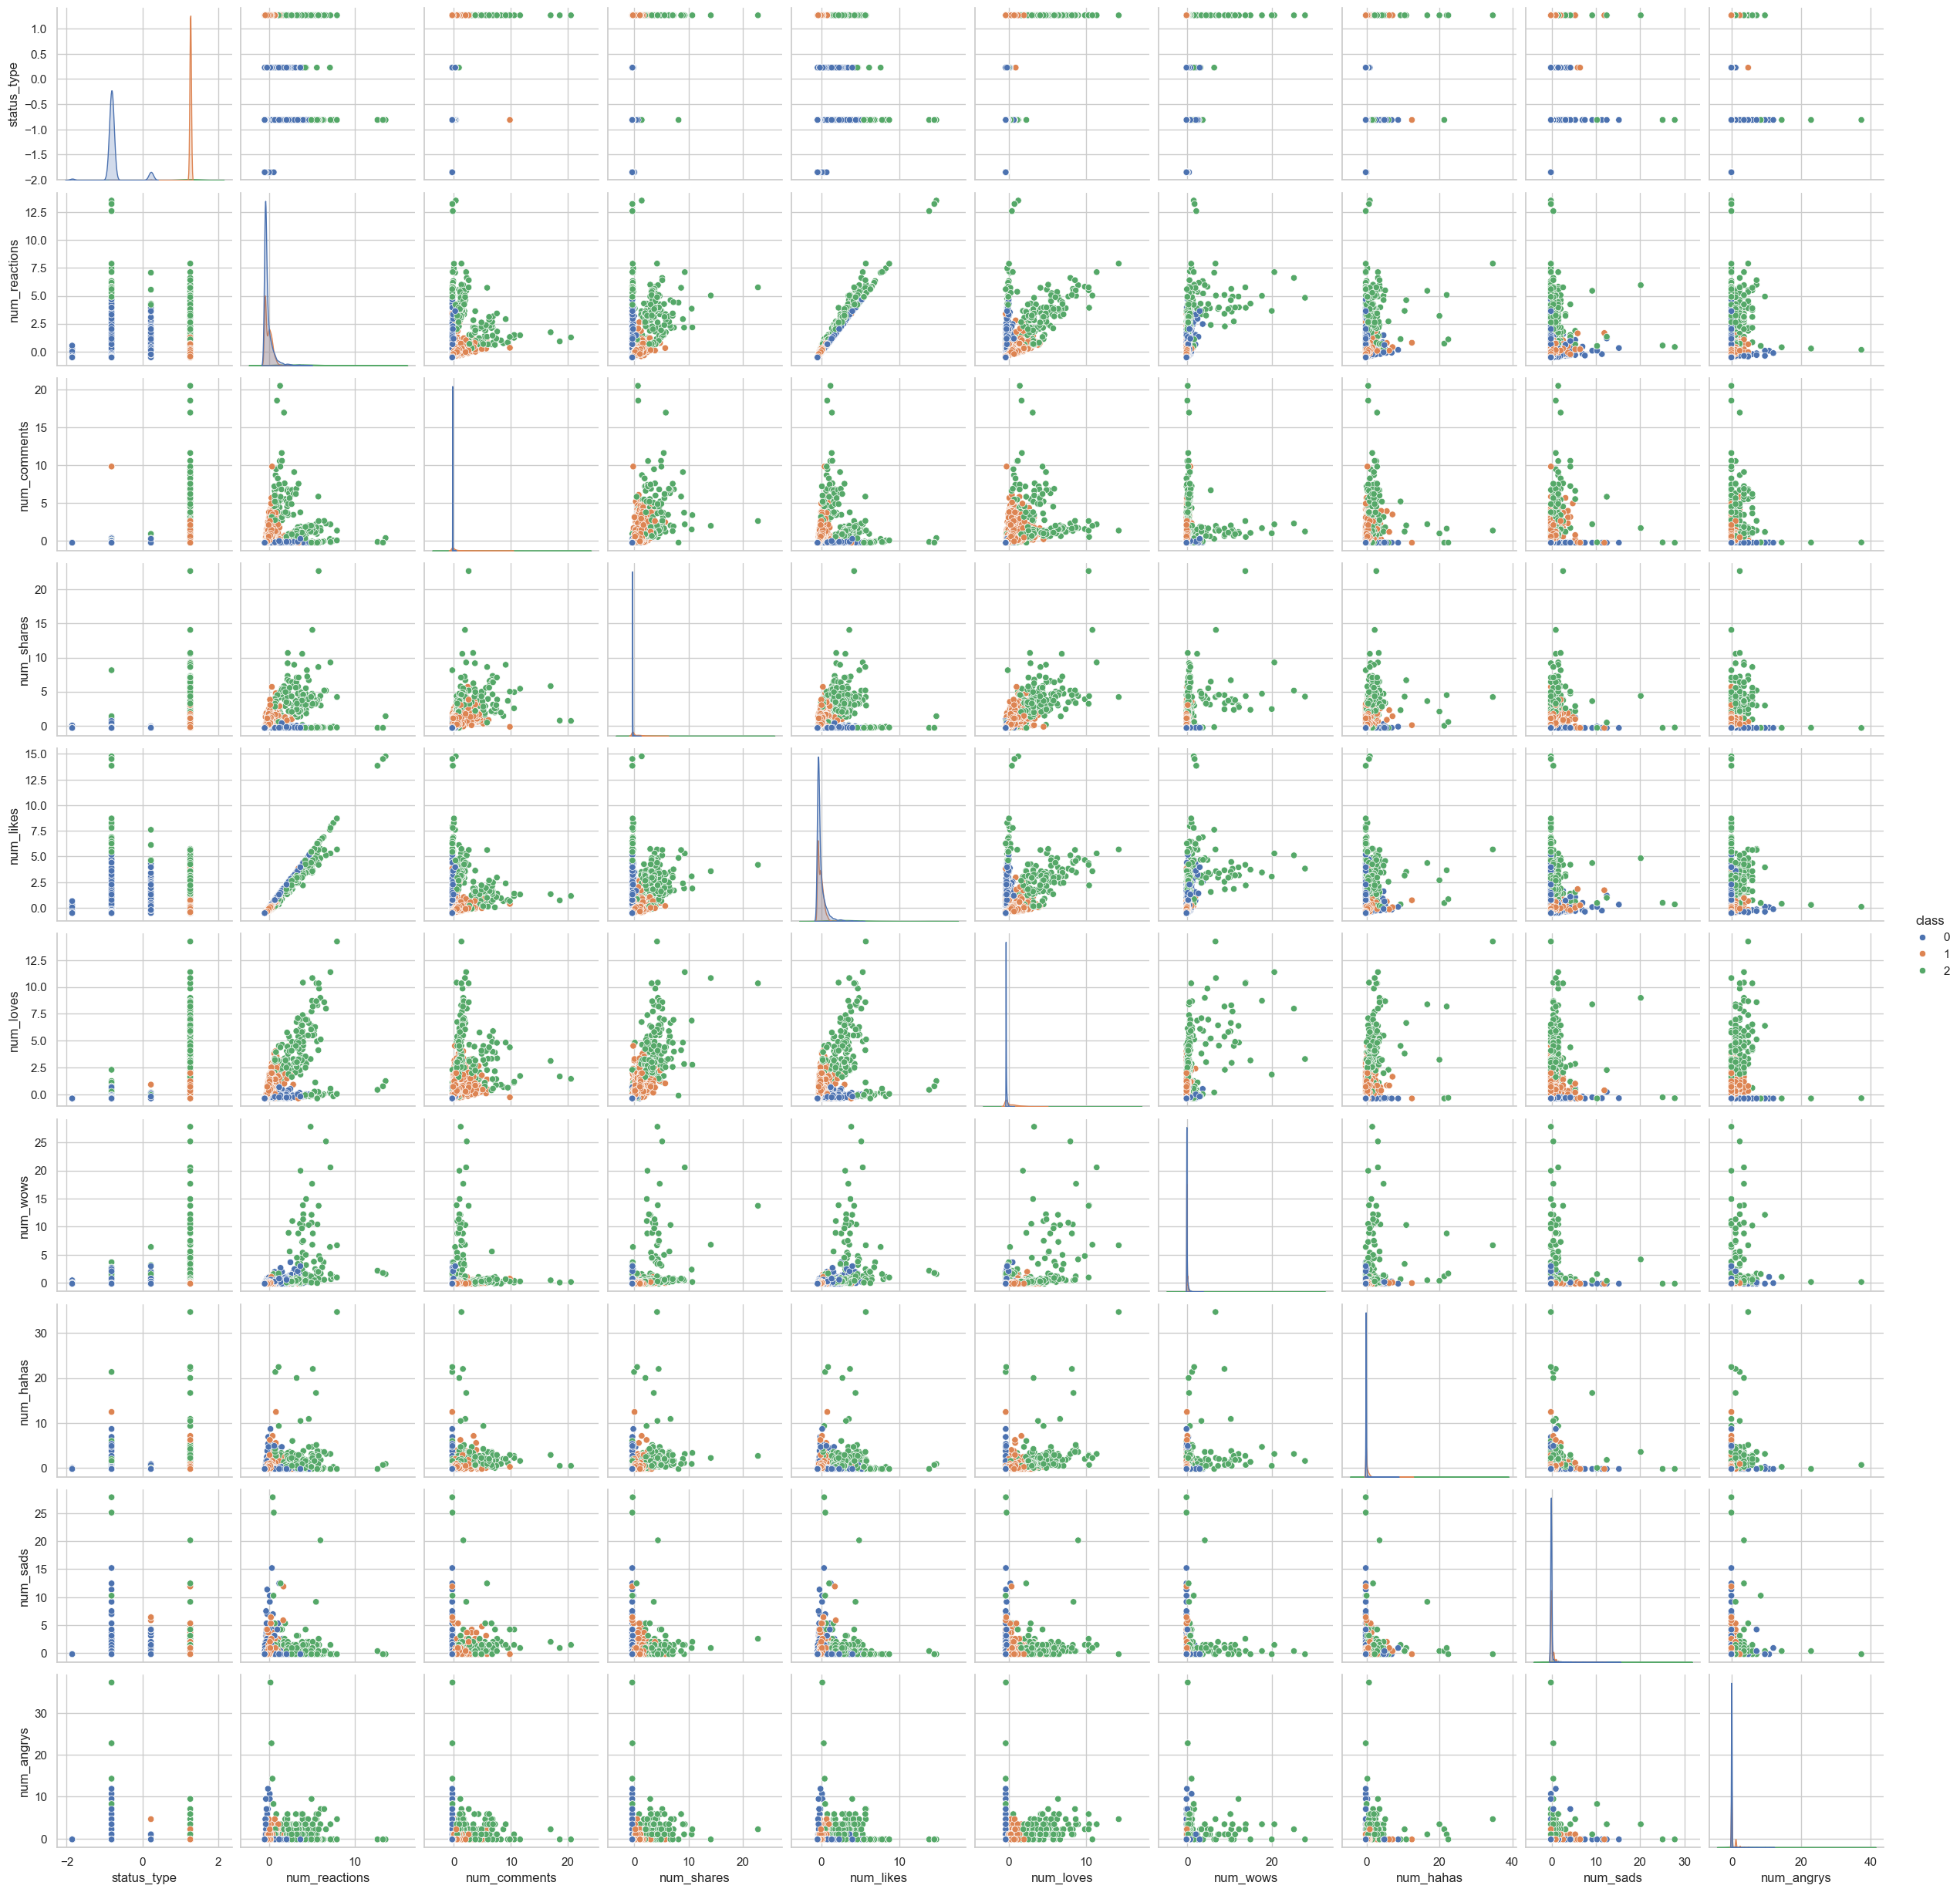

In [45]:
sns.pairplot(df_norm_t2, hue="class",palette="deep")

Amb tres grups tenim una classificació basada en la quantitat de participacions:

- grup verd: una alta participació en reaccions, comparticions, likes, loves, etc.
- grup vermell: participa més en els comentaris i moderadament en la resta
- grup blau: baixa participació

In [50]:
# I amb Spectral
sc = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
y_pred = sc.fit_predict(df_norm)

df_norm_t3 = df_norm.copy()
df_norm_t3["class"] = y_pred

# És un algorisme molt més lent que KMEANS.


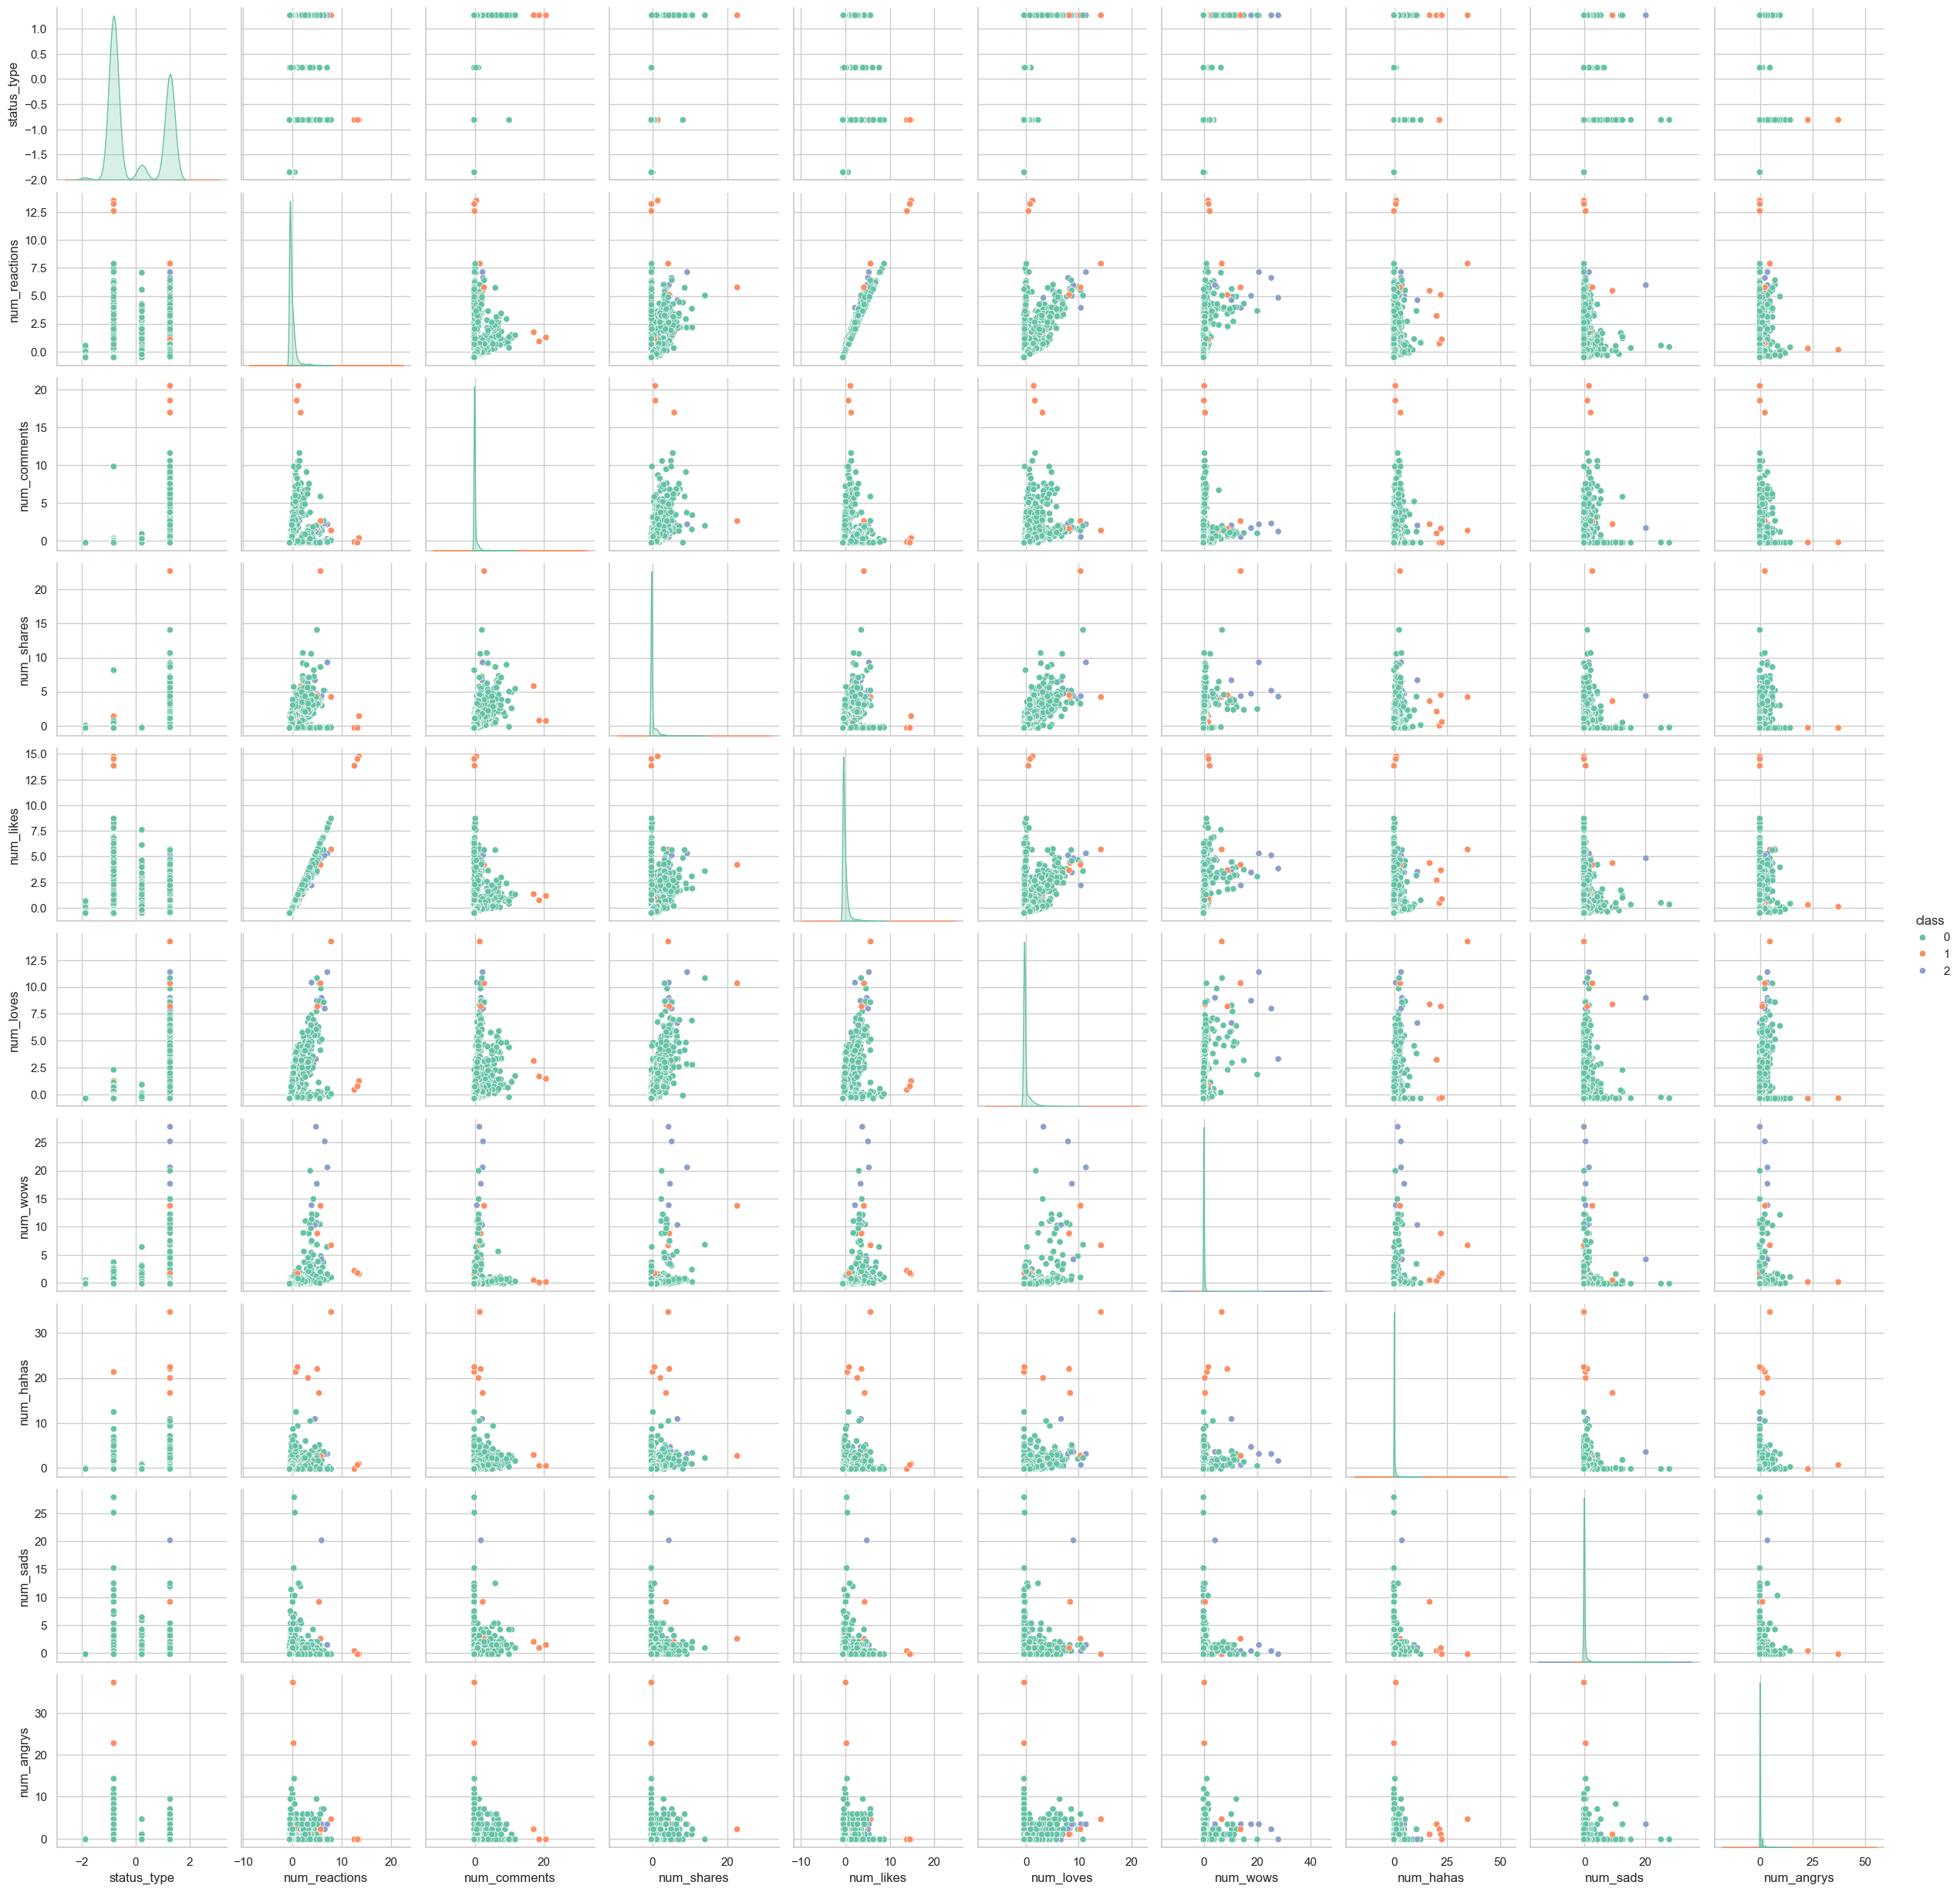

In [51]:
sns.pairplot(df_norm_t3, hue="class",palette="Set2")

<Axes: xlabel='num_reactions', ylabel='status_type'>

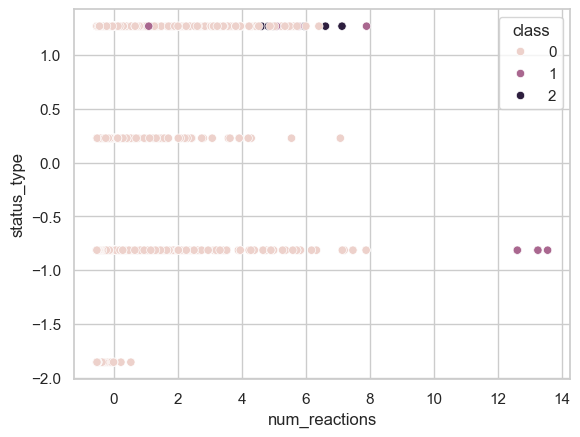

In [52]:
sns.scatterplot(data=df_norm_t3, x="num_reactions", y="status_type", hue="class")

<Axes: xlabel='num_reactions', ylabel='num_comments'>

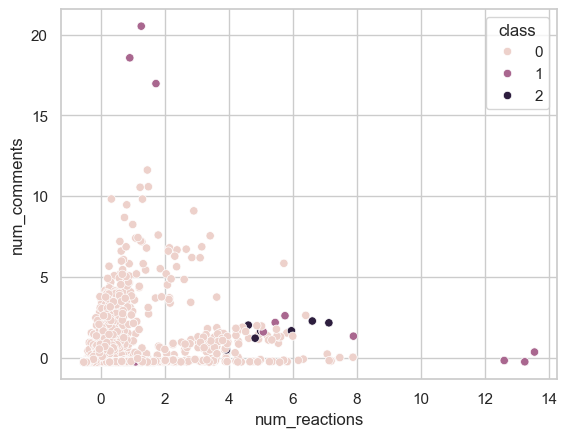

In [53]:
sns.scatterplot(data=df_norm_t3, x="num_reactions", y="num_comments", hue="class")

<Axes: xlabel='num_reactions', ylabel='num_loves'>

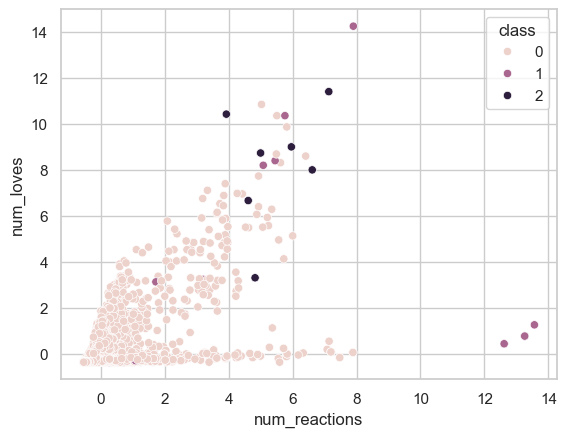

In [54]:
sns.scatterplot(data=df_norm_t3, x="num_reactions", y="num_loves", hue="class")

Amb tres grups tenim una classificació en:

- cian (classe 0): una mescla poc clarificadora d'entitats
- taronja (classe 1): major nombre de reaccions, likes, loves, angrys
- blau (classe 2): major nombre de hahas, un terme mig d'angrys